<a href="https://colab.research.google.com/github/Wayy66/Wayy66/blob/main/Stat_5650_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Stat 5650: Project: Diabetes Risk Prediction Using BRFSS Dataset


***Team Members:***

Brendan Busch

Leonce Ngirinshuti

Aflatun Kaeser

Omnia Dafalla


***Executive Summary***


Globally, non-communicable diseases (NCDs)—such as heart disease, stroke, cancer, and
diabetes—are escalating, claiming approximately 41 million lives annually and leading as the
primary cause of mortality worldwide. The socioeconomic impact of NCDs underscores the
urgency of prevention and control, positioning them as a pivotal health focus of the 21st century.
In the United States, the prevalence of diabetes exemplifies the extensive human and economic
toll exerted by chronic conditions. According to the Centers for Disease Control and Prevention
(CDC), 37.3 million Americans were diagnosed with diabetes and an additional 96 million with
prediabetes in 2021. Given the lack of a cure, early detection through routine screening is
critical to mitigating the severe complications of diabetes, including heart disease, vision loss,
kidney failure, and neuropathy. This underscores the significance of predictive modeling in
public health strategies for diabetes risk assessment.



## Dataset Description
The dataset used in this project is derived from the Behavioral Risk Factor Surveillance System (BRFSS), conducted by the CDC in 2015. It focuses on assessing the feasibility of predictive modeling in diabetes risk. The dataset includes:

- **Diabetes_012:** A target variable indicating the status of diabetes.
- **HighBP:** Indicates if the respondent has high blood pressure.
- **HighChol:** Indicates if the respondent has high cholesterol.
- **CholCheck:** Indicates if cholesterol was checked in the last five years.
- **BMI:** Body Mass Index of the respondent.
- **Smoker:** Indicates if the respondent is a smoker.
- **Stroke:** Indicates if the respondent has ever had a stroke.
- **HeartDiseaseorAttack:** Indicates if the respondent has ever had heart disease or a heart attack.
- **PhysActivity:** Physical activity engagement outside of regular job.
- **Fruits:** Regular consumption of fruits.
- **Veggies:** Regular consumption of vegetables.
- **HvyAlcoholConsump:** Indicates heavy alcohol consumption.
- **AnyHealthcare:** Indicates if the respondent has any healthcare coverage.
- **NoDocbcCost:** Indicates if the respondent did not visit a doctor due to cost.
- **GenHlth:** General health rating.
- **MentHlth:** Days felt not good mentally in the past 30 days.
- **PhysHlth:** Days felt not good physically in the past 30 days.
- **DiffWalk:** Difficulty in walking or climbing stairs.
- **Sex:** Sex of the respondent.
- **Age:** Age category of the respondent.
- **Education:** Education level of the respondent.
- **Income:** Income category of the respondent.


## Research Objectives

1. Evaluate the accuracy of predictive models using the BRFSS survey data to identify individuals at high risk for diabetes.
2. Determine the most significant predictors for diabetes risk from the BRFSS dataset.
3. Examine the performance of different machine learning models in predicting diabetes risk.
4. Investigate the effectiveness of ensemble methods like Random Forest and AdaBoost in improving prediction outcomes.

## Methodology

### Data Preparation
- Preprocess the dataset to handle categorical and numerical variables, ensuring appropriate data types and no missing values.


***Features and Target Variable Separation:*** The Diabetes_012 column is separated as the target variable, and the rest are used as features. This separation is fundamental for supervised learning.

***Train-Test Split:*** This divides the dataset into a training set (70%) and a test set (30%), which helps in evaluating the model's performance on unseen data.
Oversampling: To address class imbalance in the training data, RandomOverSampler is used, making the dataset balanced and likely improving the classifier's performance on minority classes.

### Model Development
- Employ various machine learning algorithms including:
  - **Random Forest:** Analyze feature importance and model sensitivity to different thresholds.
  - **AdaBoost:** Improve model performance using adaptive boosting.
  - **XGBoost:** Utilize extreme gradient boosting to handle class imbalance and enhance predictions.
- Conduct feature importance analysis to identify key predictors.

### Model Evaluation
- Use cross-validation to validate model robustness and avoid overfitting.
- Measure model performance using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Utilize confusion matrices and classification reports to evaluate detailed model performance.

### Advanced Analysis
- Test model generalizability on a balanced dataset (50-50 split of diabetes vs. non-diabetes).
- Adjust model parameters such as class weights and thresholds to optimize performance for unbalanced data.



In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_binary_health_indicators_BRFSS2015.csv to diabetes_binary_health_indicators_BRFSS2015.csv
Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015.csv
Saving diabetes_binary_5050split_health_indicators_BRFSS2015.csv to diabetes_binary_5050split_health_indicators_BRFSS2015.csv


##Part 1 - Import Data##

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
sns.set()
rand_state=1000

In [ ]:
df = pd.read_csv('diabetes.csv')
# Review datatype for each variables
df.info()

print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [4]:
df1 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
# Review datatype for each variables
df1.info()

print(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
df2 = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
# Review datatype for each variables
df2.info()

print(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

# Part 2 - Data Cleaning


In [ ]:
# Generate a list to convert variables into factor
variables_to_convert = [
    'Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
    'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age',
    'Education', 'Income'
]

# Convert variables to categorical factors
for variable in variables_to_convert:
    df[variable] = df[variable].astype('category')

In [5]:
# Generate a list to convert variables into factor
variables_to_convert = [
    'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
    'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age',
    'Education', 'Income'
]

# Convert variables to categorical factors
for variable in variables_to_convert:
    df1[variable] = df1[variable].astype('category')

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print columns with missing values and their corresponding counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [6]:
# Check for missing values in each column
missing_values = df1.isnull().sum()

# Print columns with missing values and their corresponding counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [ ]:
# Replace 'Diabetes_012' with the actual column name if different
diabetes_counts = df['Diabetes_012'].value_counts()

# Print the counts of each class
print("Class Distribution for Diabetes_012:")
print(diabetes_counts)

# Calculate the proportion of each class
total_samples = diabetes_counts.sum()
class_proportions = diabetes_counts / total_samples

# Print the proportions of each class
print("\nClass Proportions for Diabetes_012:")
print(class_proportions)

Class Distribution for Diabetes_012:
Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64

Class Proportions for Diabetes_012:
Diabetes_012
0    0.842412
2    0.139333
1    0.018255
Name: count, dtype: float64


In [7]:
# Replace 'Diabetes_012' with the actual column name if different
diabetes_counts = df1['Diabetes_binary'].value_counts()

# Print the counts of each class
print("Class Distribution for Diabetes_012:")
print(diabetes_counts)

# Calculate the proportion of each class
total_samples = diabetes_counts.sum()
class_proportions = diabetes_counts / total_samples

# Print the proportions of each class
print("\nClass Proportions for Diabetes_binay:")
print(class_proportions)

Class Distribution for Diabetes_012:
Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

Class Proportions for Diabetes_binay:
Diabetes_binary
0.0    0.5
1.0    0.5
Name: count, dtype: float64


***Part 3 EDA***


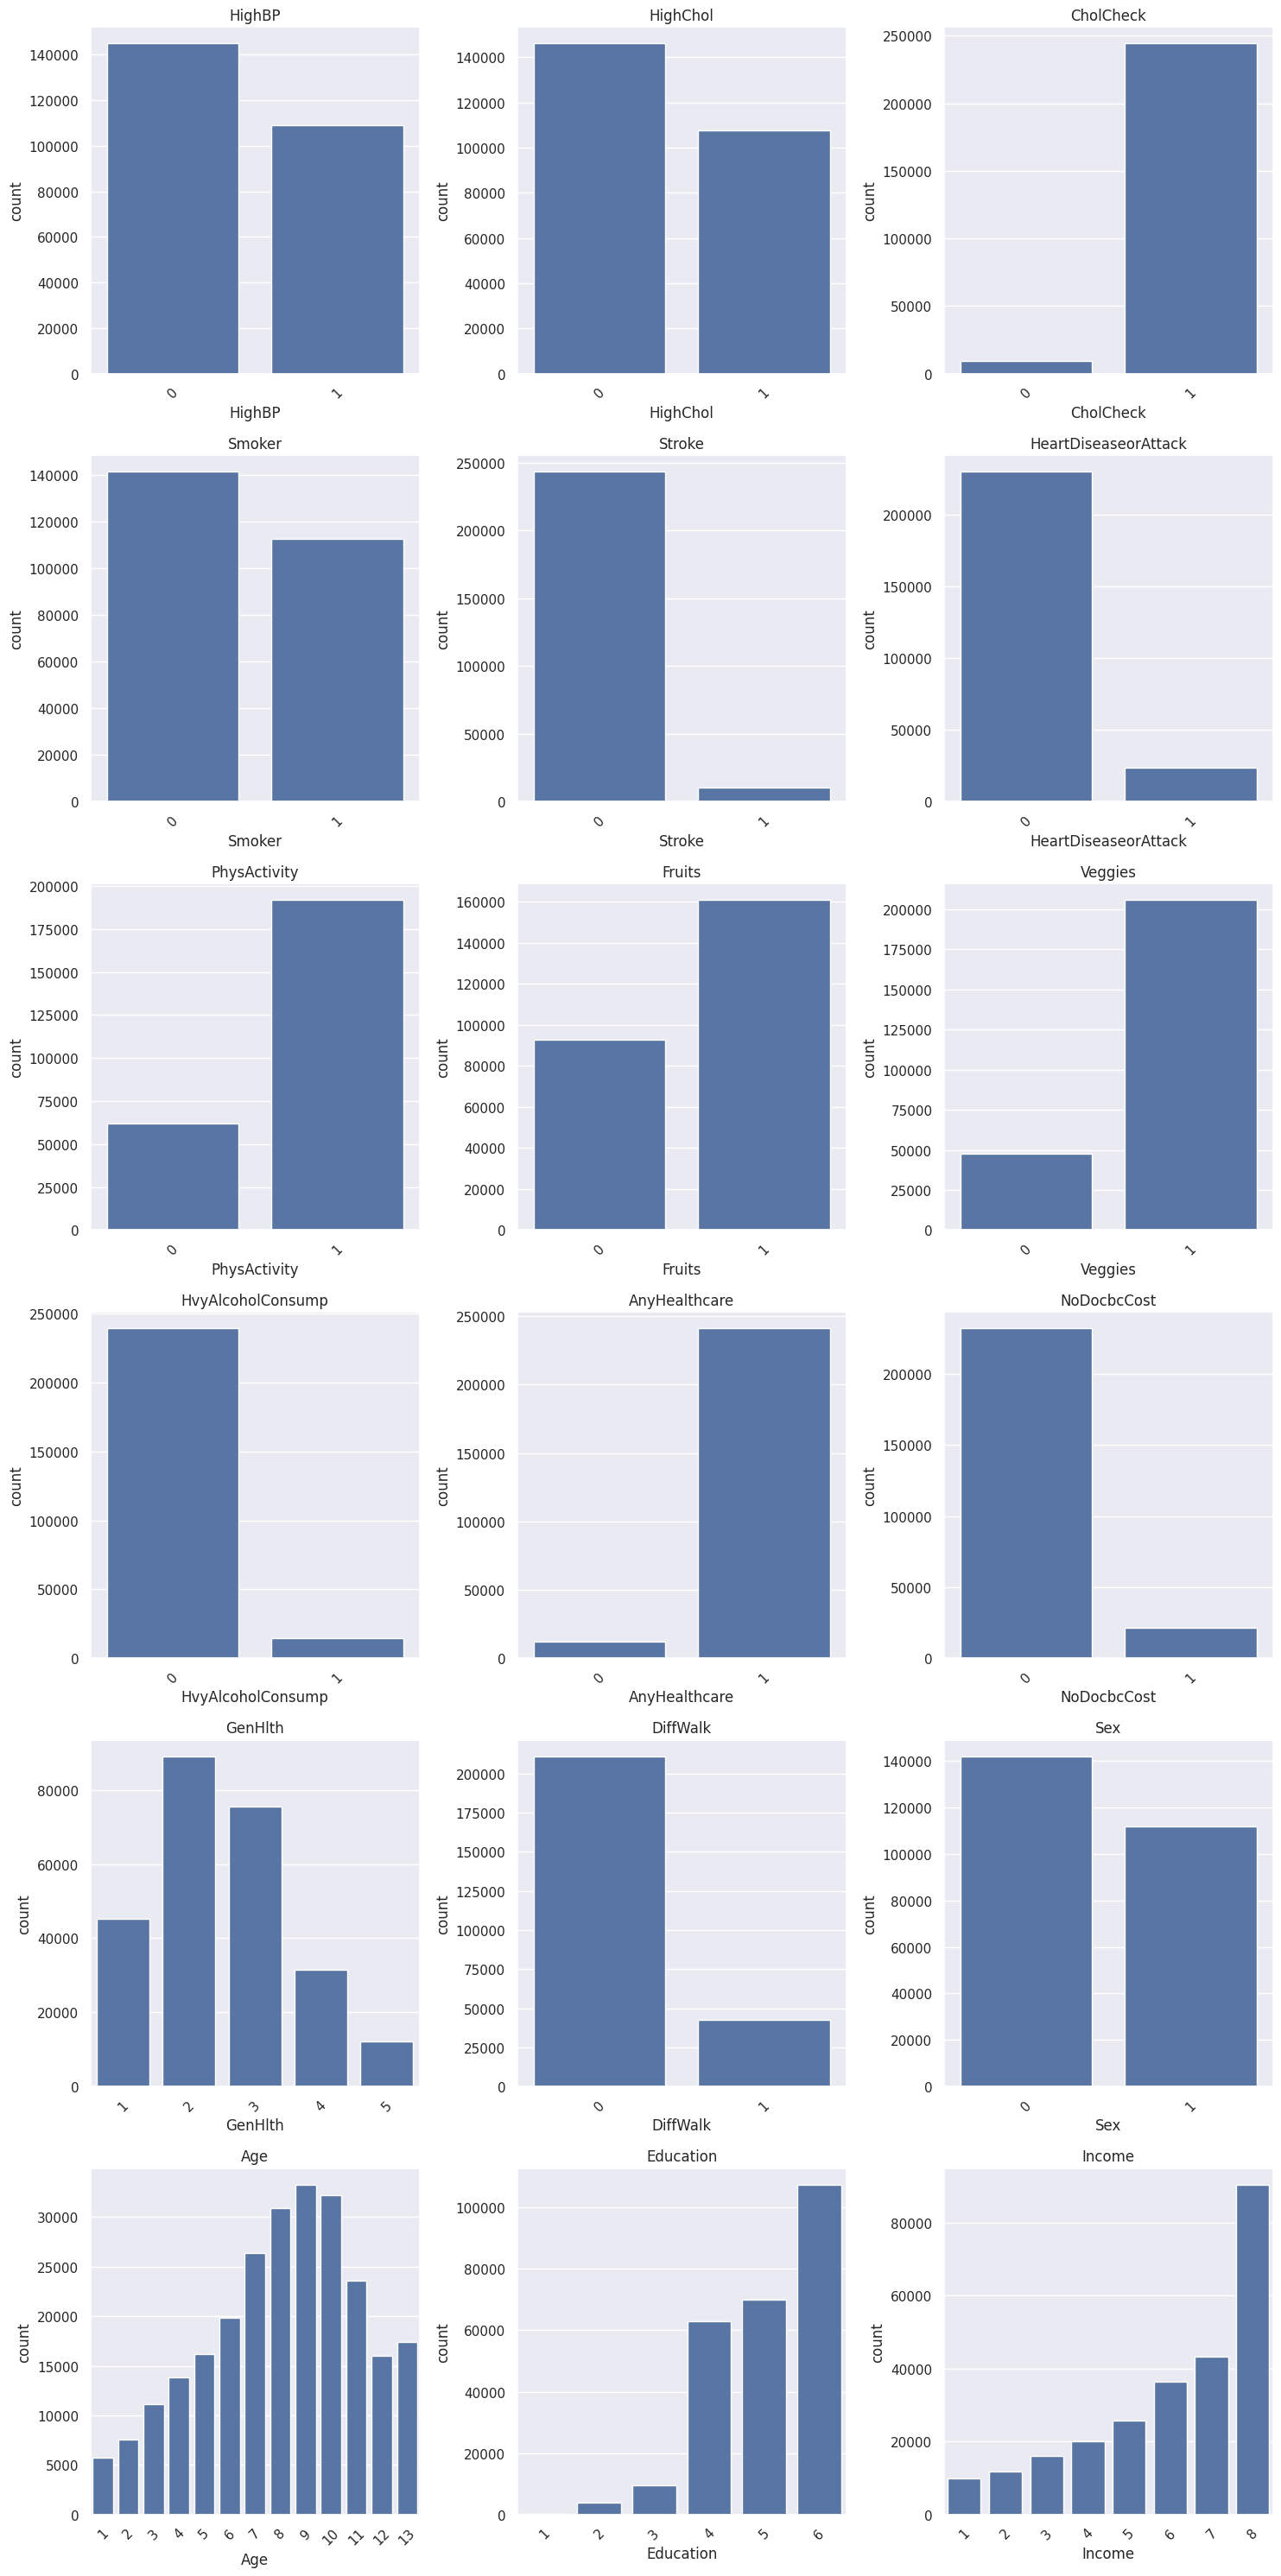

In [ ]:
# List of categorical variables
categorical_variables = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
    'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age',
    'Education', 'Income']

# Determine the number of rows needed based on the number of variables and the desired number of columns
n_rows = (len(categorical_variables) + 2) // 3

# Plotting
plt.figure(figsize=(15, 5 * n_rows))
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(n_rows, 3, i)
    sns.countplot(x=variable, data=df)
    plt.title(variable)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



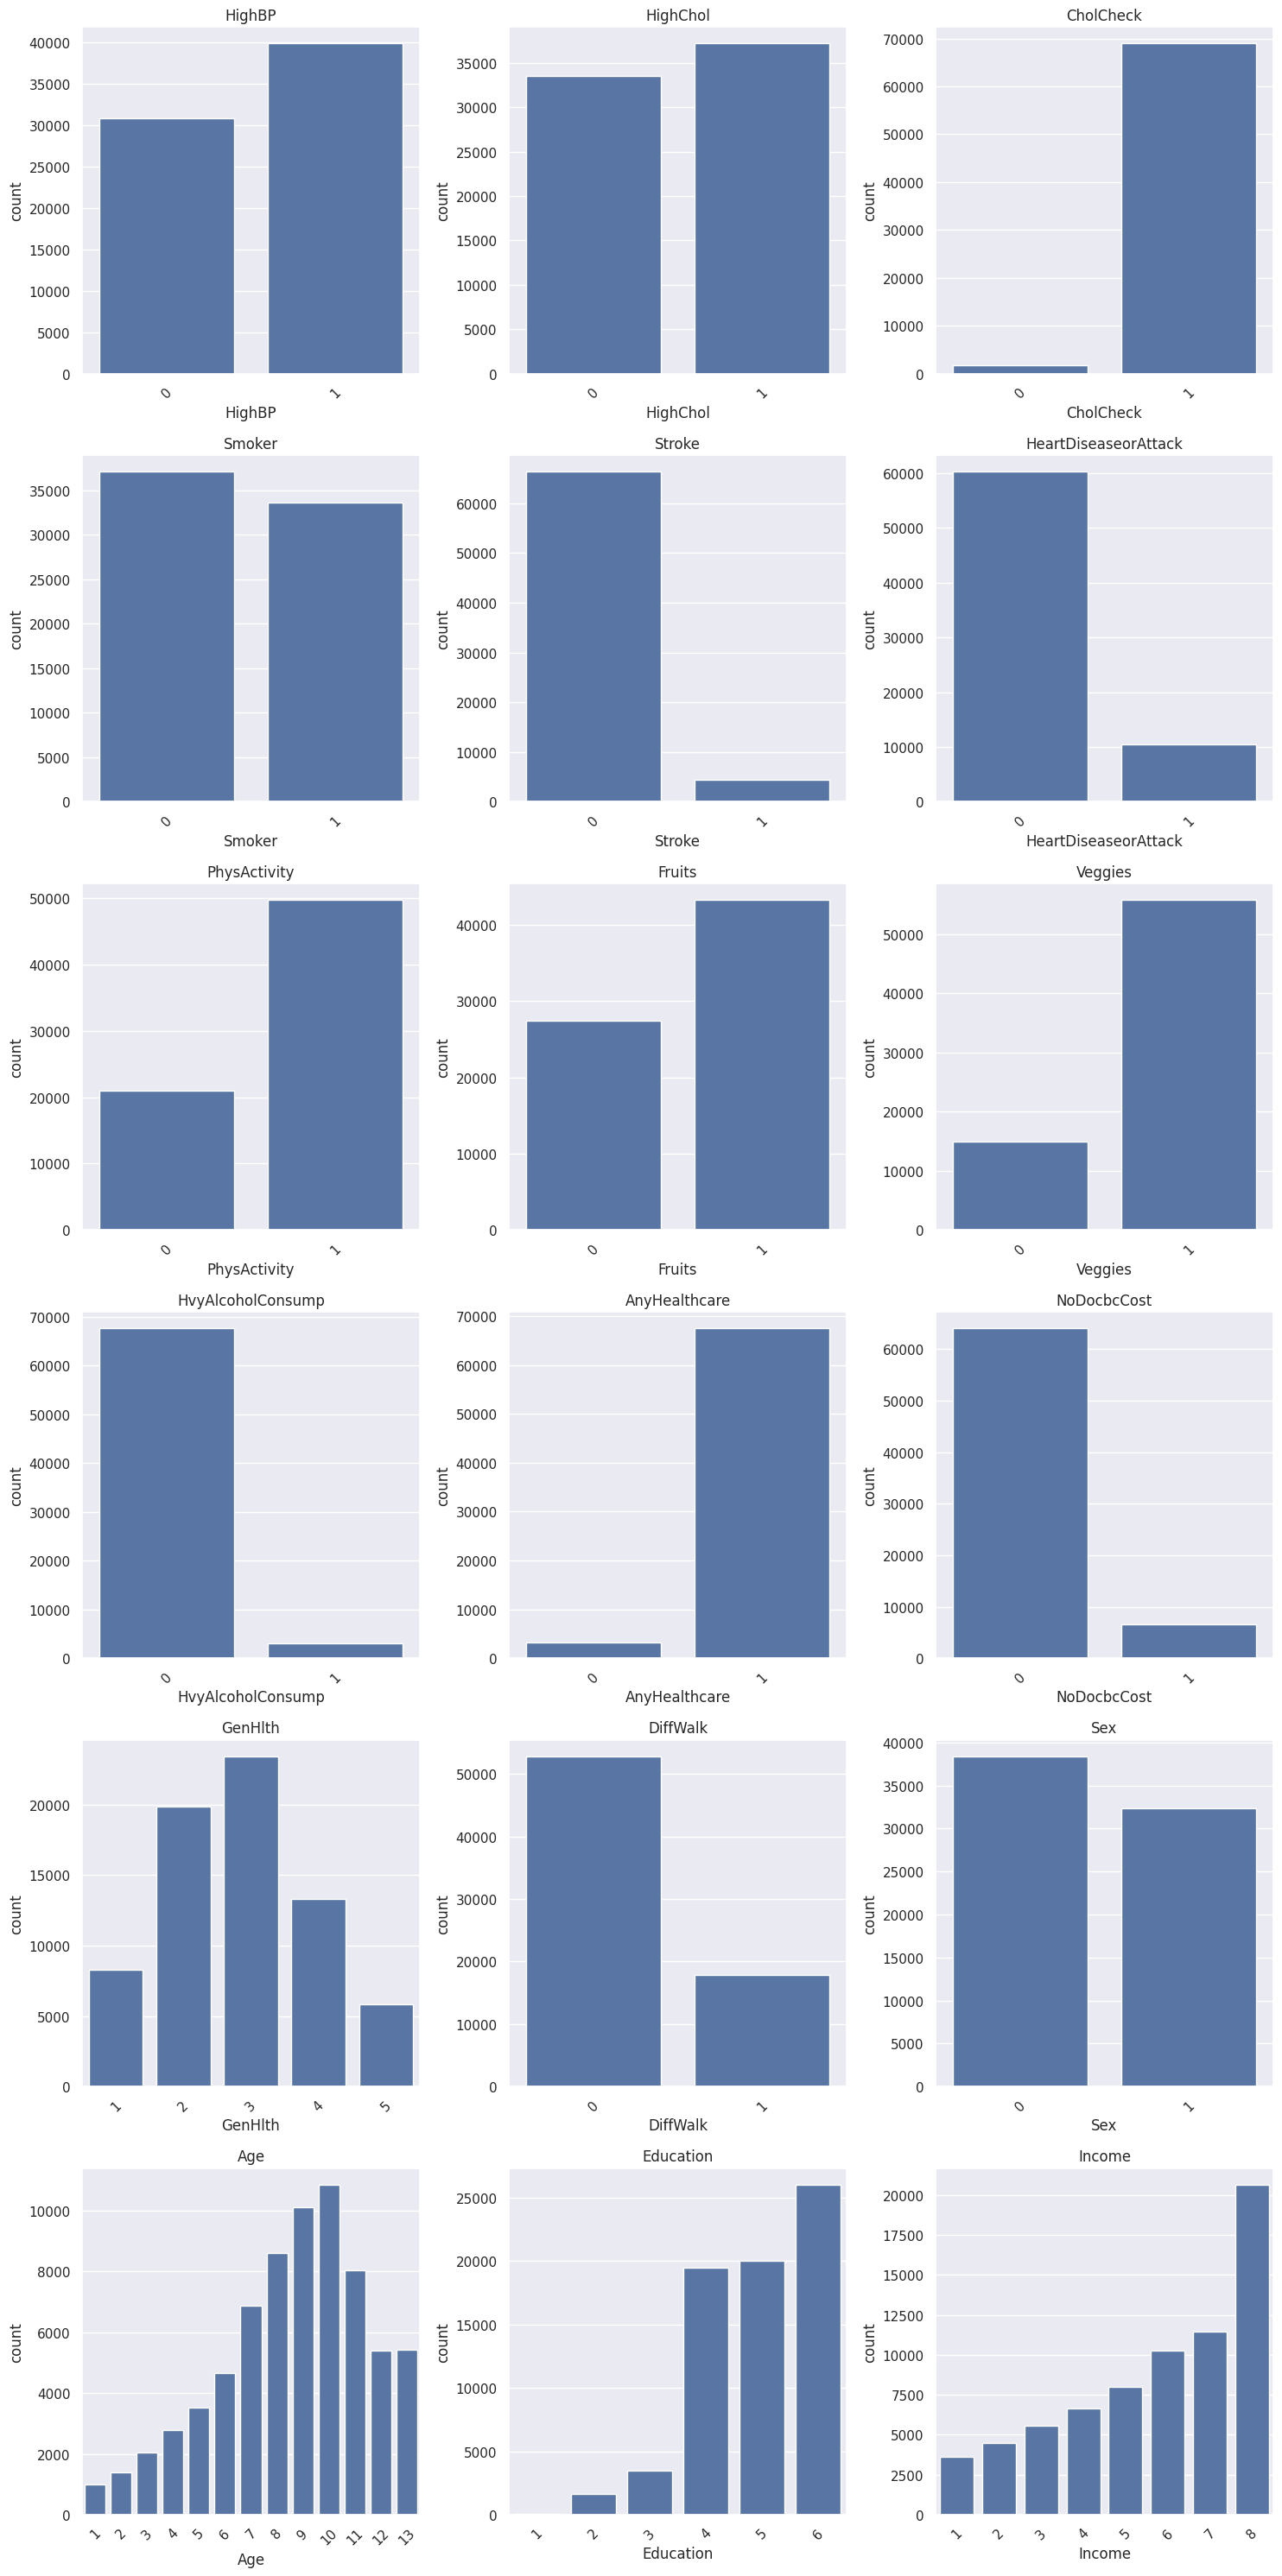

In [ ]:
# List of categorical variables
categorical_variables = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
    'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age',
    'Education', 'Income']

# Determine the number of rows needed based on the number of variables and the desired number of columns
n_rows = (len(categorical_variables) + 2) // 3

# Plotting
plt.figure(figsize=(15, 5 * n_rows))
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(n_rows, 3, i)
    sns.countplot(x=variable, data=df1)
    plt.title(variable)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Replace values 1 and 2 in 'Diabetes_012' with 1
df['Diabetes_012'] = df['Diabetes_012'].replace({1.0: 1, 2.0: 1})

# Calculate correlation matrix
corr_matrix = df.corr()

# Extract correlations of all variables with 'Diabetes_012'
diabetes_corr = corr_matrix['Diabetes_012']

# Sort correlations in descending order
diabetes_corr_sorted = diabetes_corr.abs().sort_values(ascending=False)

# Print correlations
print(diabetes_corr_sorted)

Diabetes_012            1.000000
GenHlth                 0.300785
HighBP                  0.270334
BMI                     0.223851
DiffWalk                0.222155
HighChol                0.210290
Age                     0.185891
HeartDiseaseorAttack    0.176933
PhysHlth                0.174948
Income                  0.172794
Education               0.131803
PhysActivity            0.121392
Stroke                  0.104800
MentHlth                0.074971
CholCheck               0.067879
Smoker                  0.062778
Veggies                 0.059219
HvyAlcoholConsump       0.056682
Fruits                  0.042088
NoDocbcCost             0.038025
Sex                     0.029606
AnyHealthcare           0.014079
Name: Diabetes_012, dtype: float64


***Correlation Analysis:*** Identified significant variables related to diabetes are general health, high blood pressure, and BMI.



```
+-------------------------+--------------------+
|         Feature         |   Correlation (%) |
+-------------------------+--------------------+
|         GenHlth         |       30.08        |
|          HighBP         |       27.03        |
|            BMI          |       22.39        |
|         DiffWalk        |       22.22        |
|         HighChol        |       21.03        |
|            Age          |       18.59        |
| HeartDiseaseorAttack    |       17.69        |
|         PhysHlth        |       17.50        |
|          Income         |       17.28        |
|        Education        |       13.18        |
|      PhysActivity       |       12.14        |
|          Stroke         |       10.48        |
|         MentHlth        |        7.50        |
|        CholCheck        |        6.79        |
|          Smoker         |        6.28        |
|         Veggies         |        5.92        |
|   HvyAlcoholConsump     |        5.67        |
|          Fruits         |        4.21        |
|       NoDocbcCost       |        3.80        |
|           Sex           |        2.96        |
|       AnyHealthcare     |        1.41        |
+-------------------------+--------------------+
```



In [ ]:

# Calculate correlation matrix
corr_matrix = df1.corr()

# Extract correlations of all variables with 'Diabetes_012'
diabetes_corr = corr_matrix['Diabetes_binary']

# Sort correlations in descending order
diabetes_corr_sorted = diabetes_corr.abs().sort_values(ascending=False)

# Print correlations
print(diabetes_corr_sorted)

Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
Income                  0.224449
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Education               0.170481
PhysActivity            0.158666
Stroke                  0.125427
CholCheck               0.115382
HvyAlcoholConsump       0.094853
MentHlth                0.087029
Smoker                  0.085999
Veggies                 0.079293
Fruits                  0.054077
Sex                     0.044413
NoDocbcCost             0.040977
AnyHealthcare           0.023191
Name: Diabetes_binary, dtype: float64


***Correlation Analysis:*** Identified significant variables related to diabetes are general health, high blood pressure, and BMI.

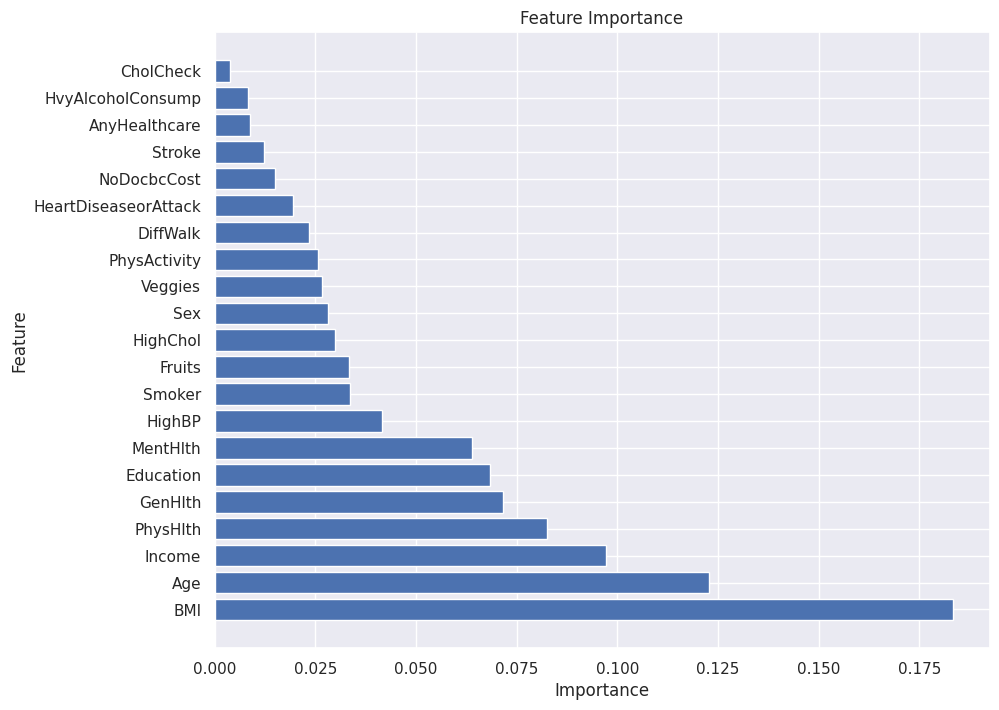

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Define X with features and y with target variable
X = df.drop('Diabetes_012', axis=1)  # Features
y = df['Diabetes_012']                # Target variable

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# Replace RandomForestClassifier with RandomForestRegressor for regression tasks
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [ ]:
# Remove specified columns
columns_to_remove = ['NoDocbcCost', 'AnyHealthcare', 'HvyAlcoholConsump', 'CholCheck']
df = df.drop(columns=columns_to_remove)

In [8]:
# Remove specified columns
columns_to_remove = ['NoDocbcCost', 'AnyHealthcare', 'HvyAlcoholConsump', 'CholCheck']
df1 = df1.drop(columns=columns_to_remove)

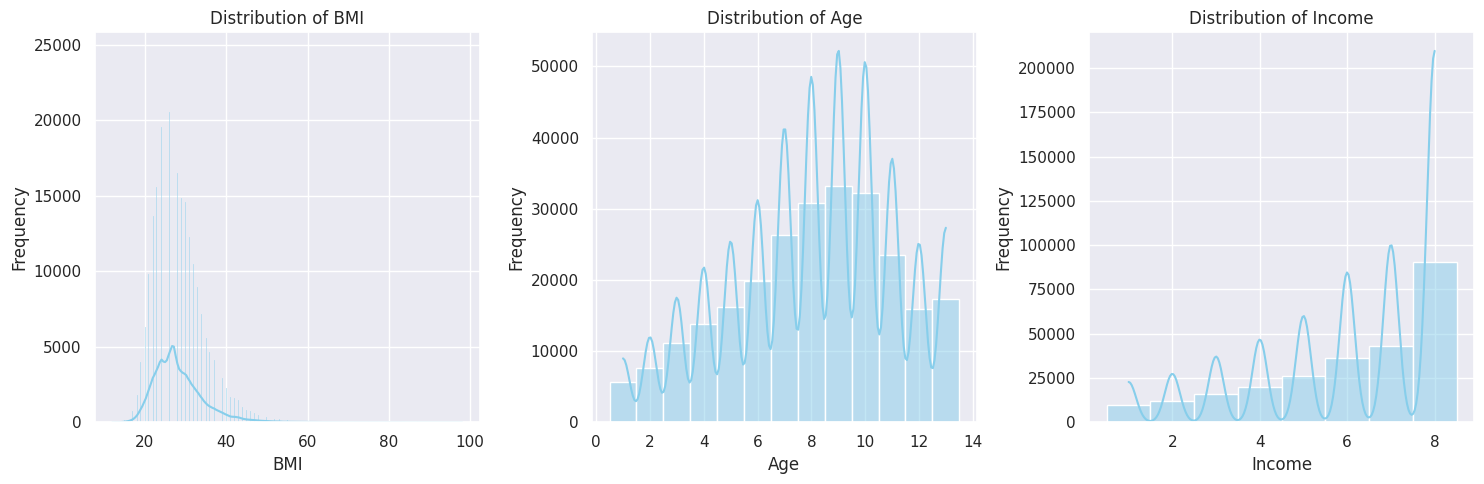

In [ ]:
# Select numerical variables for distribution analysis
numerical_vars = ['BMI', 'Age', 'Income']

# Plot histograms for selected numerical variables
plt.figure(figsize=(15, 5))

for i, var in enumerate(numerical_vars, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[var], kde=True, color='skyblue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

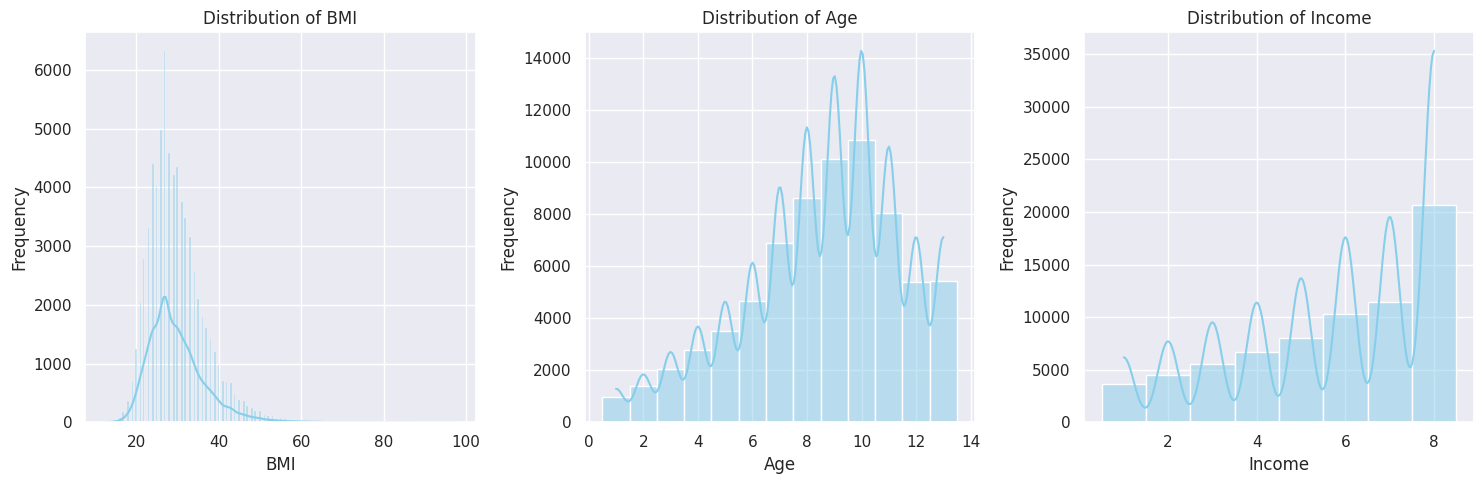

In [ ]:
# Select numerical variables for distribution analysis
numerical_vars = ['BMI', 'Age', 'Income']

# Plot histograms for selected numerical variables
plt.figure(figsize=(15, 5))

for i, var in enumerate(numerical_vars, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df1[var], kde=True, color='skyblue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

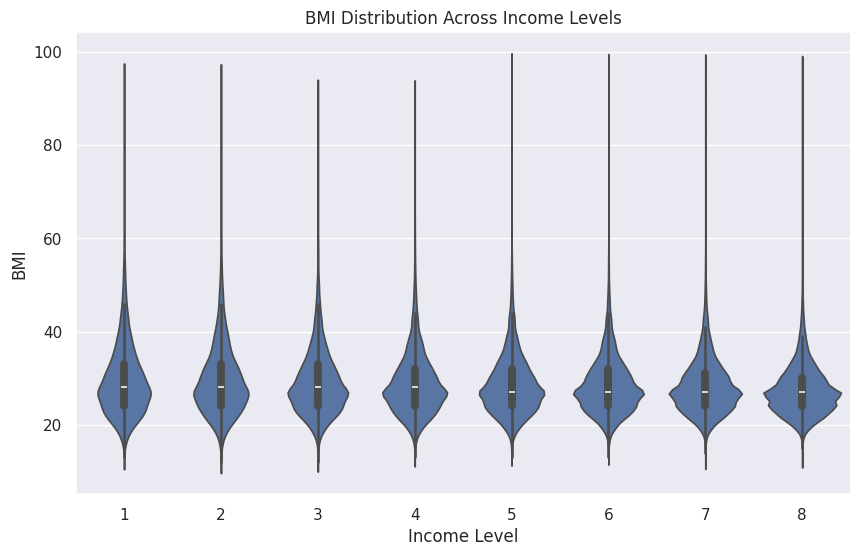

In [ ]:
# Define the order of income levels for plotting
income_order = sorted(df['Income'].unique())

# Create a violin plot for BMI vs. Income
plt.figure(figsize=(10, 6))
sns.violinplot(x='Income', y='BMI', data=df, order=income_order)
plt.title('BMI Distribution Across Income Levels')
plt.xlabel('Income Level')
plt.ylabel('BMI')
plt.xticks(ticks=range(len(income_order)), labels=income_order)
plt.show()


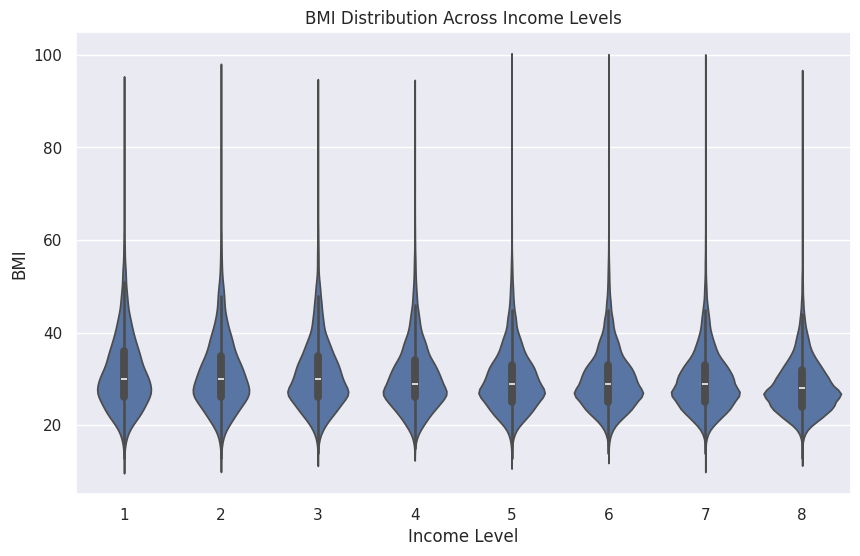

In [ ]:
# Define the order of income levels for plotting
income_order = sorted(df1['Income'].unique())

# Create a violin plot for BMI vs. Income
plt.figure(figsize=(10, 6))
sns.violinplot(x='Income', y='BMI', data=df1, order=income_order)
plt.title('BMI Distribution Across Income Levels')
plt.xlabel('Income Level')
plt.ylabel('BMI')
plt.xticks(ticks=range(len(income_order)), labels=income_order)
plt.show()

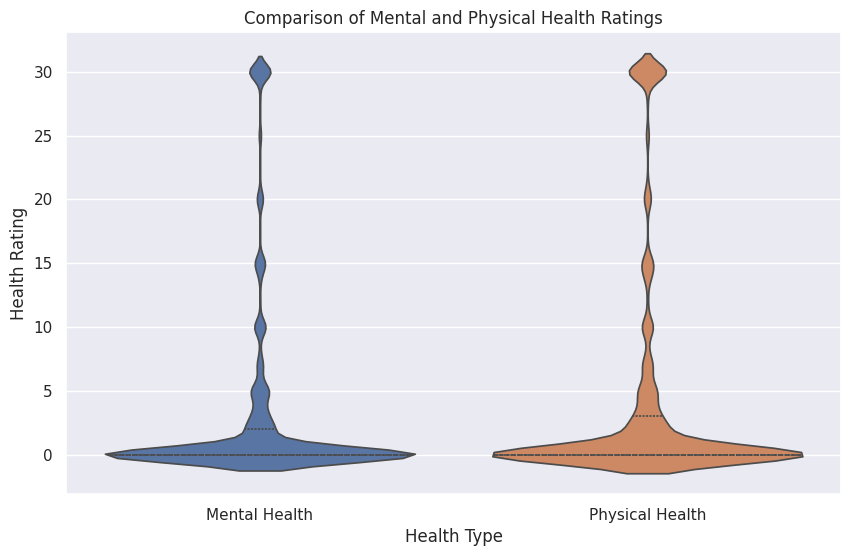

In [ ]:
# Create a violin plot for Mental Health vs. Physical Health
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['MentHlth', 'PhysHlth']], inner='quartile')
plt.title('Comparison of Mental and Physical Health Ratings')
plt.xlabel('Health Type')
plt.ylabel('Health Rating')
plt.xticks(ticks=[0, 1], labels=['Mental Health', 'Physical Health'])
plt.show()

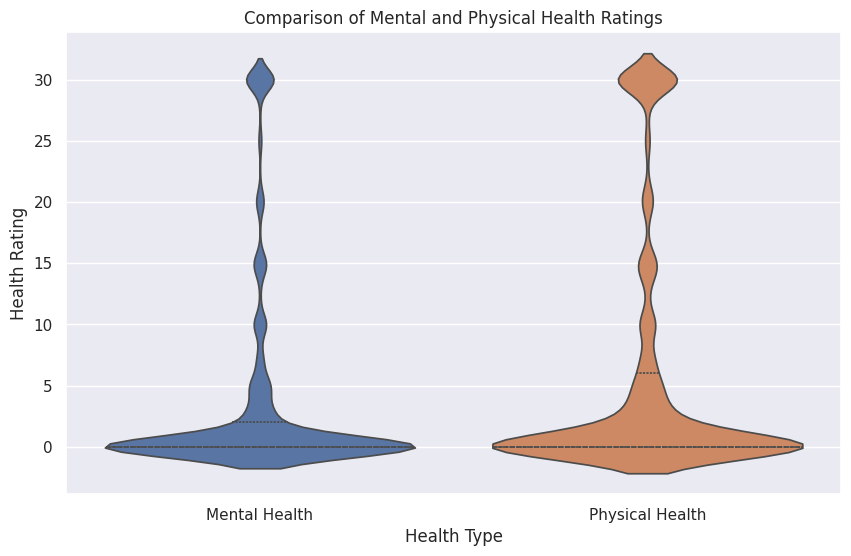

In [ ]:
# Create a violin plot for Mental Health vs. Physical Health
plt.figure(figsize=(10, 6))
sns.violinplot(data=df1[['MentHlth', 'PhysHlth']], inner='quartile')
plt.title('Comparison of Mental and Physical Health Ratings')
plt.xlabel('Health Type')
plt.ylabel('Health Rating')
plt.xticks(ticks=[0, 1], labels=['Mental Health', 'Physical Health'])
plt.show()

In [ ]:
# Remove specified columns
columns_to_remove = ['NoDocbcCost', 'AnyHealthcare', 'HvyAlcoholConsump', 'CholCheck']
df1 = df1.drop(columns=columns_to_remove)

***Part 4 - Split Training and Testing dataset***

In [ ]:
from sklearn.model_selection import train_test_split

# Define X with features and y with target variable
X = df.drop('Diabetes_012', axis=1)  # Features
y = df['Diabetes_012']                # Target variable

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

In [12]:
from sklearn.model_selection import train_test_split

# Define X with features and y with target variable
X = df1.drop('Diabetes_binary', axis=1)  # Features
y = df1['Diabetes_binary']                # Target variable

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

***Part 5 - Generating RF model***

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Instantiate RandomForestClassifier with class_weight='balanced'
rf_classifier = RandomForestClassifier(class_weight='balanced')

# Perform cross-validation and get accuracy scores
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Fit the classifier on the entire training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_hat = rf_classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_hat)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_hat)

print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)
print("\nCross-Validation Mean Accuracy:", cv_scores.mean())

Confusion Matrix:
[[61469  2525]
 [ 9886  2224]]

Accuracy: 0.8369205298013245

Cross-Validation Mean Accuracy: 0.8401754798193561




```
# Evaluation Table
+---------------------+-------------------------+-------------------------+
|                     |    Predicted Negative   |    Predicted Positive   |
+---------------------+-------------------------+-------------------------+
|  Actual Negative    |          61499          |           2495          |
+---------------------+-------------------------+-------------------------+
|  Actual Positive    |          9840           |           2270          |
+---------------------+-------------------------+-------------------------+
```

***Random Forest Model:*** Achieved a baseline accuracy of about 84% in predicting diabetes status, indicating good model performance on the general dataset.

**Part 6 - Lowering treshold of the RF model**

In [ ]:
# Instantiate RandomForestClassifier with class_weight='balanced'
rf_classifier = RandomForestClassifier(class_weight='balanced')

# Perform cross-validation and get accuracy scores
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Fit the classifier on the entire training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_hat_prob = rf_classifier.predict_proba(X_test)[:, 1]  # Probability of class 1
threshold = 0.2
y_hat = (y_hat_prob >= threshold).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_hat)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_hat)

print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)
print("\nCross-Validation Mean Accuracy:", cv_scores.mean())

Confusion Matrix:
[[47732 16262]
 [ 3863  8247]]

Accuracy: 0.7355592347314202

Cross-Validation Mean Accuracy: 0.8403049985922234


```
# Evaluation Table
+---------------------+-------------------------+-------------------------+
|                     |    Predicted Negative   |    Predicted Positive   |
+---------------------+-------------------------+-------------------------+
|  Actual Negative    |          47732          |           16262         |
+---------------------+-------------------------+-------------------------+
|  Actual Positive    |          3863           |           8247          |
+---------------------+-------------------------+-------------------------+
```

***Validating with 50-50 split dataset***


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

#Fitting our random forest to a new dataset df1 (50-50 split)

# Preparing the data
X_diabetes = df1.drop(columns=['Diabetes_binary'])  # Correct the typo in column name
y_diabetes = df1['Diabetes_binary']                 # Correct the typo in column name

# Predictions in the new dataset (50-50 split dataset)
diabetes_pred = rf_classifier.predict(X_diabetes)          # Use the correct DataFrame for predictions
diabetes_prob = rf_classifier.predict_proba(X_diabetes)[:, 1]  # Same here, correct DataFrame

# Calculating the confusion matrix
conf_matrix_diabetes = confusion_matrix(y_diabetes, diabetes_pred)
print(conf_matrix_diabetes)
print("Validation Accuracy: ", accuracy_score(y_diabetes, diabetes_pred))

# Evaluate the model
accuracy = accuracy_score(y_diabetes, diabetes_pred)
report = classification_report(y_diabetes, diabetes_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


[[34232  1114]
 [ 8866 26480]]
Validation Accuracy:  0.8588241950998698
Accuracy: 0.8588241950998698
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     35346
           1       0.96      0.75      0.84     35346

    accuracy                           0.86     70692
   macro avg       0.88      0.86      0.86     70692
weighted avg       0.88      0.86      0.86     70692



```
# Evaluation Table
+---------------------+-------------------------+-------------------------+
|                     |    Predicted Negative   |    Predicted Positive   |
+---------------------+-------------------------+-------------------------+
|  Actual Negative    |          34232          |           1114          |
+---------------------+-------------------------+-------------------------+
|  Actual Positive    |          8866           |           26480         |
+---------------------+-------------------------+-------------------------+
```

***Model Performance:*** The Random Forest model is doing better job in the new dataset

***Part 7 - Adaboosting***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Apply oversampling to balance classes
oversampler = RandomOverSampler(random_state=1000)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Instantiate AdaBoostClassifier
ada_classifier = AdaBoostClassifier()

# Fit the classifier to the resampled training data
ada_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = ada_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.7297382529170608
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.82     63994
         1.0       0.34      0.76      0.47     12110

    accuracy                           0.73     76104
   macro avg       0.64      0.74      0.65     76104
weighted avg       0.85      0.73      0.76     76104



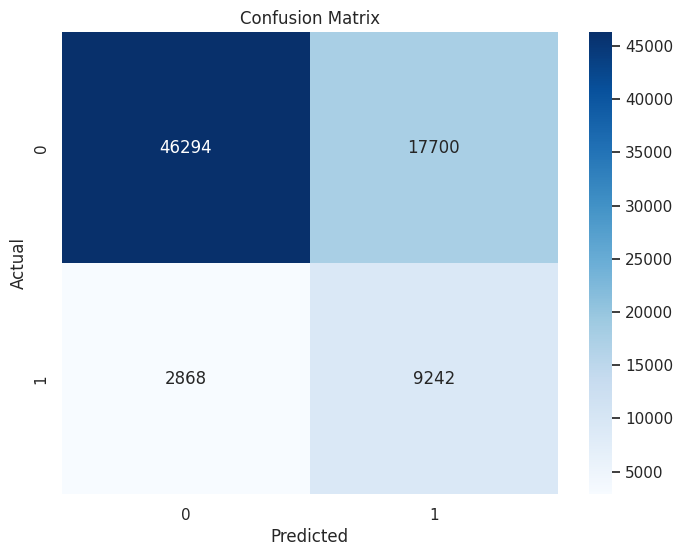

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler

###Fitting our random forest to a new dataset df1 (50-50 split)

# Prepare the data from df1 for prediction
X_diabetes = df1.drop(columns=['Diabetes_binary'])
y_diabetes = df1['Diabetes_binary']

# Predictions on the new dataset (50-50 split dataset)
diabetes_pred = ada_classifier.predict(X_diabetes)
diabetes_prob = ada_classifier.predict_proba(X_diabetes)[:, 1]

# Calculating the confusion matrix and accuracy
conf_matrix_diabetes = confusion_matrix(y_diabetes, diabetes_pred)
accuracy = accuracy_score(y_diabetes, diabetes_pred)

# Print out the confusion matrix and accuracy
print("Confusion Matrix:")
print(conf_matrix_diabetes)
print("\nValidation Accuracy:", accuracy)

# Generate a classification report to evaluate other metrics
report = classification_report(y_diabetes, diabetes_pred)

# Display the classification report
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[23020  6163  6163]
 [ 5814  8592 20940]
 [    0     0     0]]

Validation Accuracy: 0.4471793130764443

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.65      0.72     35346
           1       0.58      0.24      0.34     35346
           2       0.00      0.00      0.00         0

    accuracy                           0.45     70692
   macro avg       0.46      0.30      0.35     70692
weighted avg       0.69      0.45      0.53     70692



***Model Performance:*** We see that in our new dataset the model is doing better job.

***Part 8 - XGBoost***

Accuracy: 0.7251918427415116
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.81     63994
         1.0       0.34      0.77      0.47     12110

    accuracy                           0.73     76104
   macro avg       0.64      0.74      0.64     76104
weighted avg       0.85      0.73      0.76     76104



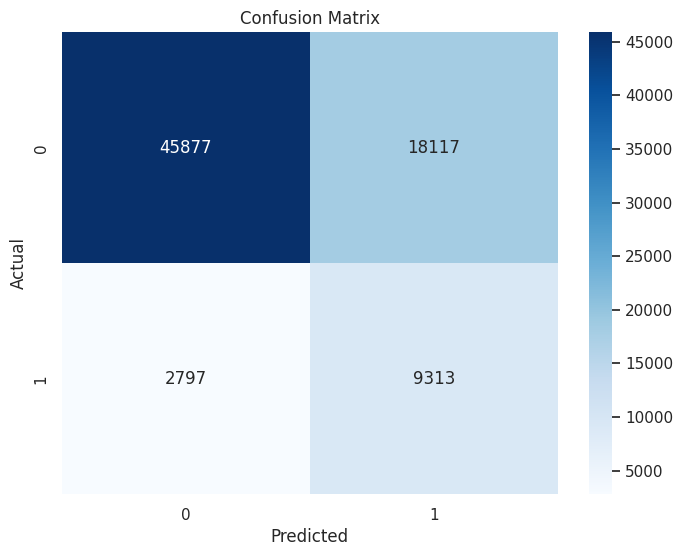

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define X with features and y with target variable
X = df.drop('Diabetes_012', axis=1)  # Features
y = df['Diabetes_012']                # Target variable

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=1000)

# Calculate the ratio of negative class instances to positive class instances
neg_pos_ratio = (y_train == 0).sum() / (y_train == 1).sum()

# Instantiate XGBoost classifier with balanced scale_pos_weight
xgb_classifier = XGBClassifier(scale_pos_weight=neg_pos_ratio)

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Confusion Matrix for df1:
[[25298 10048]
 [ 6497 28849]]

Validation Accuracy on df1: 0.7659565438804957

Classification Report for df1:
              precision    recall  f1-score   support

           0       0.80      0.72      0.75     35346
           1       0.74      0.82      0.78     35346

    accuracy                           0.77     70692
   macro avg       0.77      0.77      0.77     70692
weighted avg       0.77      0.77      0.77     70692



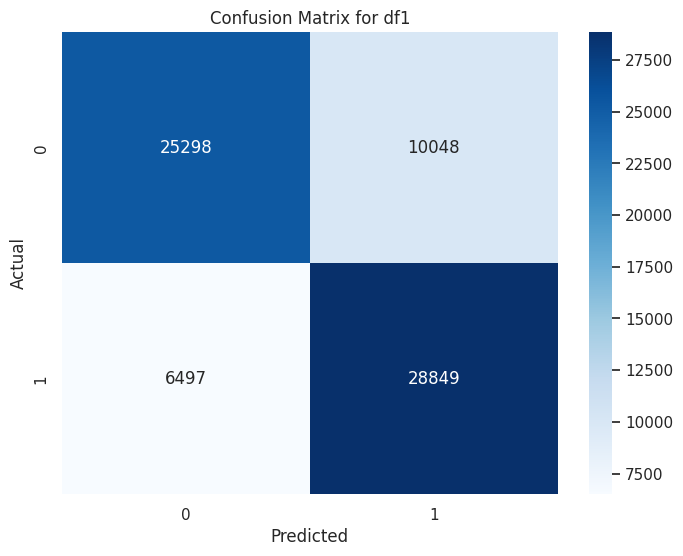

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from xgboost import XGBClassifier

# Fitting the XGBoost model in the new dataset df1 (50-50 split)

# Prepare the data from df1 for prediction
X_df1 = df1.drop('Diabetes_binary', axis=1)  # Adjust the target column name if necessary
X_df1_encoded = pd.get_dummies(X_df1)  # One-hot encode categorical variables

# Make sure to align columns in df1 to match those in the trained model X_train
# This step ensures that X_df1_encoded has the same feature columns in the same order as X_train
X_df1_encoded = X_df1_encoded.reindex(columns=X_train.columns, fill_value=0)

y_df1 = df1['Diabetes_binary']  # Target variable from df1

# Predictions on the new dataset
y_pred_df1 = xgb_classifier.predict(X_df1_encoded)

# Calculating the confusion matrix and accuracy
conf_matrix_df1 = confusion_matrix(y_df1, y_pred_df1)
accuracy_df1 = accuracy_score(y_df1, y_pred_df1)

# Print out the confusion matrix and accuracy
print("Confusion Matrix for df1:")
print(conf_matrix_df1)
print("\nValidation Accuracy on df1:", accuracy_df1)

# Generate a classification report to evaluate other metrics
report_df1 = classification_report(y_df1, y_pred_df1)

# Display the classification report
print("\nClassification Report for df1:")
print(report_df1)

# Plot confusion matrix for df1
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for df1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


***Part 9 - XGBoost with RandomOverSampler and tuning***

In [ ]:
# Generate a list to convert variables into factor
variables_to_convert_2 = [
    'HighBP', 'HighChol', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'
]

# Perform one-hot encoding, including the target variable 'Diabetes_012'
encoded_df = pd.get_dummies(df, columns=variables_to_convert_2)

# Display the first few rows of the encoded dataframe
print(encoded_df.head())


  Diabetes_012 CholCheck  BMI HvyAlcoholConsump AnyHealthcare NoDocbcCost  \
0            0         1   40                 0             1           0   
1            0         0   25                 0             0           1   
2            0         1   28                 0             1           1   
3            0         1   27                 0             1           0   
4            0         1   24                 0             1           0   

   MentHlth  PhysHlth  HighBP_0  HighBP_1  ...  Education_5  Education_6  \
0        18        15     False      True  ...        False        False   
1         0         0      True     False  ...        False         True   
2        30        30     False      True  ...        False        False   
3         0         0     False      True  ...        False        False   
4         3         0     False      True  ...         True        False   

   Income_1  Income_2  Income_3  Income_4  Income_5  Income_6  Income_7  \
0    

Accuracy: 0.724902764637864
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     63994
         1.0       0.34      0.78      0.47     12110

    accuracy                           0.72     76104
   macro avg       0.64      0.75      0.64     76104
weighted avg       0.85      0.72      0.76     76104



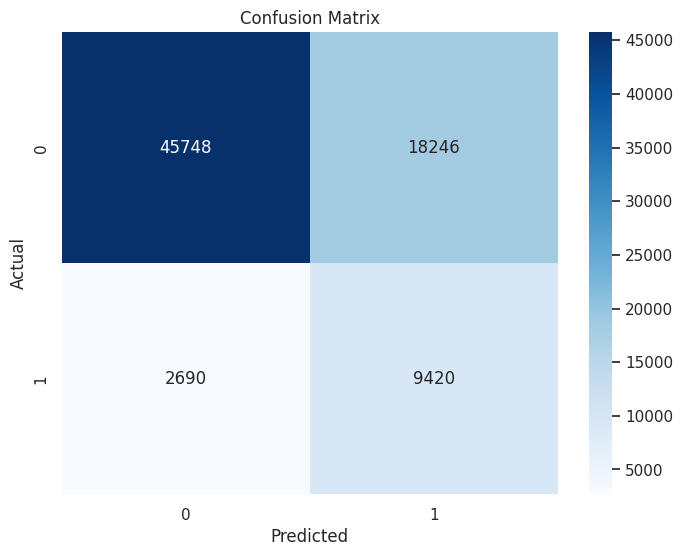

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Separate features and target variable
X = encoded_df.drop('Diabetes_012', axis=1)
y = encoded_df['Diabetes_012']

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# Apply RandomOverSampler to balance classes in the training set
oversampler = RandomOverSampler(random_state=1000)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Define the parameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Instantiate XGBoost classifier
xgb_classifier = XGBClassifier(random_state=1000)

# Perform grid search to find the best parameters
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_

# Instantiate XGBoost classifier with the best parameters
xgb_classifier_tuned = XGBClassifier(random_state=1000, **best_params)

# Fit the classifier to the resampled training data
xgb_classifier_tuned.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = xgb_classifier_tuned.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# Generate a list to convert variables into factor
variables_to_convert_3 = [
    'HighBP', 'HighChol', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'
]

# Perform one-hot encoding, including the target variable 'Diabetes_binary'
encoded_df1 = pd.get_dummies(df1, columns=variables_to_convert_3)

# Display the first few rows of the encoded dataframe
print(encoded_df1.head())

  Diabetes_binary   BMI  MentHlth  PhysHlth  HighBP_0.0  HighBP_1.0  \
0             0.0  26.0       5.0      30.0       False        True   
1             0.0  26.0       0.0       0.0       False        True   
2             0.0  26.0       0.0      10.0        True       False   
3             0.0  28.0       0.0       3.0       False        True   
4             0.0  29.0       0.0       0.0        True       False   

   HighChol_0.0  HighChol_1.0  Smoker_0.0  Smoker_1.0  ...  Education_5.0  \
0          True         False        True       False  ...          False   
1         False          True       False        True  ...          False   
2          True         False        True       False  ...          False   
3         False          True       False        True  ...          False   
4          True         False       False        True  ...           True   

   Education_6.0  Income_1.0  Income_2.0  Income_3.0  Income_4.0  Income_5.0  \
0           True       False  

Accuracy: 0.7436344775556394
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73     10697
         1.0       0.72      0.78      0.75     10511

    accuracy                           0.74     21208
   macro avg       0.75      0.74      0.74     21208
weighted avg       0.75      0.74      0.74     21208



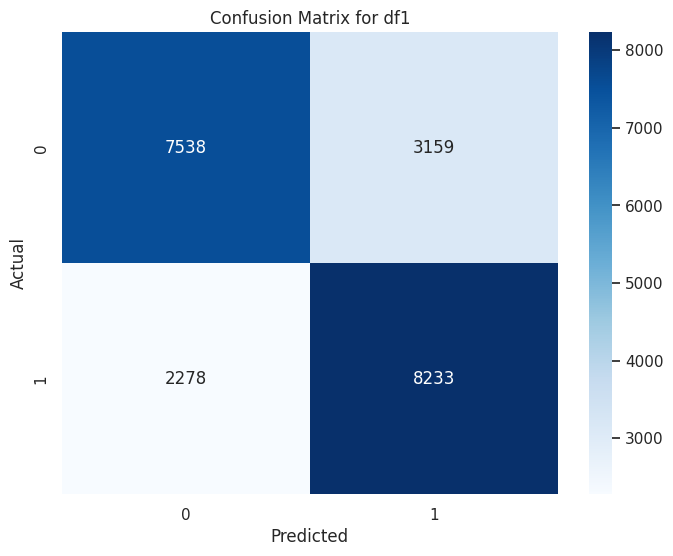

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Separate features and target variable
X_df1 = encoded_df1.drop('Diabetes_binary', axis=1)
y_df1 = encoded_df1['Diabetes_binary']

# Split the data into train and test sets (70% train, 30% test)
X_train_df1, X_test_df1, y_train_df1, y_test_df1 = train_test_split(X_df1, y_df1, test_size=0.3, random_state=1000)

# Apply RandomOverSampler to balance classes in the training set
oversampler_df1 = RandomOverSampler(random_state=1000)
X_train_resampled_df1, y_train_resampled_df1 = oversampler_df1.fit_resample(X_train_df1, y_train_df1)

# Define the parameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Instantiate XGBoost classifier
xgb_classifier_df1 = XGBClassifier(random_state=1000)

# Perform grid search to find the best parameters
grid_search_df1 = GridSearchCV(estimator=xgb_classifier_df1, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_df1.fit(X_train_resampled_df1, y_train_resampled_df1)

# Get the best parameters
best_params_df1 = grid_search_df1.best_params_

# Instantiate XGBoost classifier with the best parameters
xgb_classifier_tuned_df1 = XGBClassifier(random_state=1000, **best_params_df1)

# Fit the classifier to the resampled training data
xgb_classifier_tuned_df1.fit(X_train_resampled_df1, y_train_resampled_df1)

# Make predictions on the test set
y_pred_df1 = xgb_classifier_tuned_df1.predict(X_test_df1)

# Evaluate the model
accuracy_df1 = accuracy_score(y_test_df1, y_pred_df1)
report_df1 = classification_report(y_test_df1, y_pred_df1)

# Display evaluation metrics
print("Accuracy:", accuracy_df1)
print("Classification Report:")
print(report_df1)

# Calculate confusion matrix
conf_matrix_df1 = confusion_matrix(y_test_df1, y_pred_df1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for df1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Model Performance Evaluation and Interpretation

## Random Forest Model Evaluation

### General Performance
- **Accuracy**: The Random Forest model demonstrated high baseline accuracy, approximately 84%, indicating strong performance on the general dataset.

### Impact of Lowering the Classification Threshold
- **Adjustments**: Lowering the classification threshold to 0.2 resulted in a notable decrease in accuracy to approximately 73.56%. This adjustment led to a significant increase in false positives, prioritizing sensitivity over specificity.
- **Implications**: This change enhances the model's ability to identify potential diabetes cases but increases the likelihood of false alarms.

### Performance on 50-50 Split Dataset
- **Validation Accuracy**: Testing on a balanced dataset of about 70,000 observations showed an improvement in validation accuracy to approximately 85.88%.
- **Generalization**: Confirms the model's enhanced ability to generalize and perform effectively across different data distributions.

## AdaBoost Model Evaluation

### Balanced Performance
- **Efficiency**: AdaBoost excelled in balancing recall and precision, especially evident in the balanced dataset scenario.
- **Advantages**: This model is particularly beneficial in conditions where minimizing both false negatives and false positives is crucial.

### Versatility in Various Scenarios
- **Adaptability**: AdaBoost's ability to adjust its focus based on the errors of previous iterations makes it versatile and robust across different levels of class distribution.

## XGBoost Model Evaluation

### Handling of Imbalanced Data
- **Strengths**: XGBoost was effective in managing imbalanced data, improving the detection of less frequent cases through its sophisticated gradient boosting framework.

### Overall Efficiency and Predictive Power
- **Performance**: Maintained high efficiency and predictive power across datasets, with notable effectiveness in fine-tuning predictions based on detailed characteristics of the training data.

## Specific Findings from Data Outputs

### Random Forest on 50-50 Split
- **Observations**: Demonstrated significant gains in a balanced environment, suggesting better performance when the class distribution is more evenly distributed.

### Lower Threshold Impact
- **Consequences**: Lowering the decision threshold significantly affected the balance between detecting as many positives as possible and maintaining a reasonable number of false positives.

### AdaBoost and XGBoost
- **Adaptability**: Both models proved highly adaptable, with AdaBoost showing better handling of equal class distribution and XGBoost excelling in scenarios with imbalanced classes.
